In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('/content/keyword(final).csv', encoding = 'utf-8')

train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

In [3]:
test_data

,Text,Emotion,Arousal,Valence,Keyword(final)
33296,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,neutral,1,4,부당한
61689,다음주에 엄마 생일이잖아. 잊은 건 아니지?,surprise,2,5,다음주
64030,우와 그림 잘 그리시나봐요.,neutral,1,5,그리시나봐요
55513,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,2,2,본업도
18151,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",sad,7,3,미안해
...,...,...,...,...,...
46058,아까 문-이과 통합 사례에 대해 말씀하셨는데요,neutral,1,5,아까
5133,나 지금 핸드폰으로 게임 할거야.,neutral,6,6,으로
15308,아빠 나 좋은 소식이 있어.,happy,7,8,좋은
40233,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",surprise,3,3,어머


In [4]:
test_data.to_csv("test_split.csv", index = False)

['happy', 'sad', 'InActive Angry', 'Active Angry', 'InActive Dislike', 'Active Dislike', 'InActive Fear', 'Active Fear', 'contempt', 'InActive Surprise', 'Active Surprise', 'neutral']
[ 8  4  2  6  9  1 11  7  5  3 10  0]
Ranking by Softmax Probability:
Rank 1: Contempt (Probability: 0.1037)
Rank 2: Inactive dislike (Probability: 0.0992)
Rank 3: Inactive angry (Probability: 0.0892)
Rank 4: Inactive fear (Probability: 0.0864)
Rank 5: Inactive surprise (Probability: 0.0860)
Rank 6: Sad (Probability: 0.0817)
Rank 7: Neutral (Probability: 0.0814)
Rank 8: Active fear (Probability: 0.0754)
Rank 9: Active dislike (Probability: 0.0752)
Rank 10: Active angry (Probability: 0.0748)
Rank 11: Active surprise (Probability: 0.0743)
Rank 12: Happy (Probability: 0.0727)


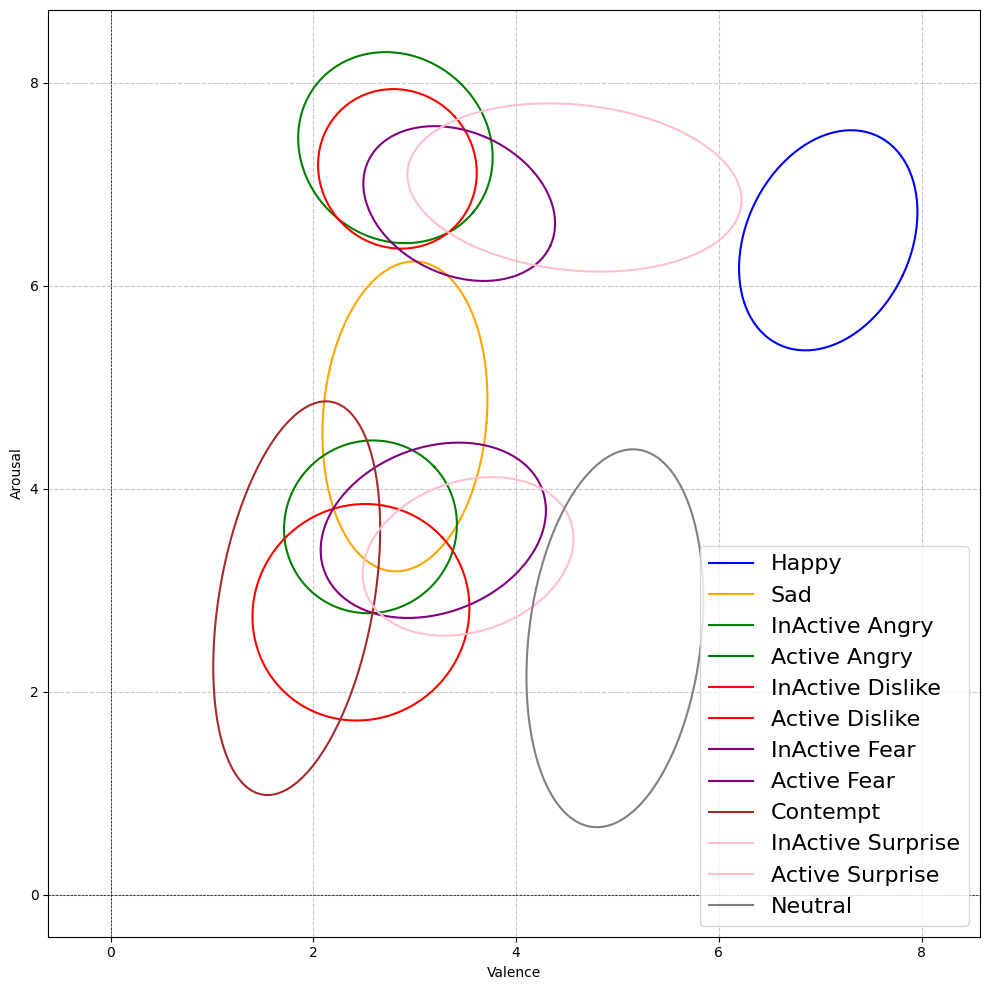

In [5]:
emotions = ['happy', 'sad', 'angry', 'dislike', 'fear', 'contempt', 'surprise', 'neutral']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

plt.figure(figsize=(10, 10))
xlim = (0, 10)
ylim = (0, 10)

#시각화 예시 확인용
input_valence = 1
input_arousal =1

distances = []

#거리 계산 후 저장 및 최종 감정 저장 리스트
emotions_result=[]
emotion_ellipse_center={}

for i, emotion in enumerate(emotions):
    emotion_data = train_data[train_data['Emotion'] == emotion]
    valence_mean = emotion_data['Valence'].mean()
    arousal_mean = emotion_data['Arousal'].mean()
    valence_std = emotion_data['Valence'].std()
    arousal_std = emotion_data['Arousal'].std()

    # 회전각 계산
    rho = np.corrcoef(emotion_data['Valence'], emotion_data['Arousal'])[0, 1]
    rotation_angle = 0.5 * np.arctan(2 * rho * valence_std * arousal_std / (valence_std**2 - arousal_std**2))

    # 타원 파라미터 계산
    center_x = valence_mean
    center_y = arousal_mean
    radius_x = valence_std
    radius_y = arousal_std

    # 타원 좌표 생성
    t = np.linspace(0, 2*np.pi, 100)
    x = center_x + radius_x * np.cos(t) * np.cos(rotation_angle) - radius_y * np.sin(t) * np.sin(rotation_angle)
    y = center_y + radius_x * np.cos(t) * np.sin(rotation_angle) + radius_y * np.sin(t) * np.cos(rotation_angle)

    # 나눈 부분의 비율 계산
    total_arousal = emotion_data['Arousal']
    total_valence = emotion_data['Valence']

    active_low_arousal = total_arousal[(total_arousal >= 1) & (total_arousal <= 5)]
    active_low_valence = total_valence[(total_arousal >= 1) & (total_arousal <= 5)]

    active_high_arousal = total_arousal[(total_arousal >= 6) & (total_arousal <= 10)]
    active_high_valence = total_valence[(total_arousal >= 6) & (total_arousal <= 10)]

    ratio_low = len(active_low_arousal) / len(total_arousal)
    ratio_high = len(active_high_arousal) / len(total_arousal)

    # "InActive" 영역의 타원 파라미터 계산
    center_x_inactive = active_low_valence.mean()
    center_y_inactive = active_low_arousal.mean()
    radius_x_inactive = active_low_valence.std()
    radius_y_inactive = active_low_arousal.std()

    # "Active" 영역의 타원 파라미터 계산
    center_x_active = active_high_valence.mean()
    center_y_active = active_high_arousal.mean()
    radius_x_active = active_high_valence.std()
    radius_y_active = active_high_arousal.std()

    # "InActive" 영역의 회전각도 계산
    rho_inactive = np.corrcoef(active_low_valence, active_low_arousal)[0, 1]
    rotation_angle_inactive = 0.5 * np.arctan(2 * rho_inactive * radius_x_inactive * radius_y_inactive / (radius_x_inactive**2 - radius_y_inactive**2))

    # "Active" 영역의 회전각도 계산
    rho_active = np.corrcoef(active_high_valence, active_high_arousal)[0, 1]
    rotation_angle_active = 0.5 * np.arctan(2 * rho_active * radius_x_active * radius_y_active / (radius_x_active**2 - radius_y_active**2))

    # "InActive" 영역의 타원 좌표 생성
    x_low_arousal = center_x_inactive + radius_x_inactive * np.cos(t) * np.cos(rotation_angle_inactive) - radius_y_inactive * np.sin(t) * np.sin(rotation_angle_inactive)
    y_low_arousal = center_y_inactive + radius_x_inactive * np.cos(t) * np.sin(rotation_angle_inactive) + radius_y_inactive * np.sin(t) * np.cos(rotation_angle_inactive)

    # "Active" 영역의 타원 좌표 생성
    x_high_arousal = center_x_active + radius_x_active * np.cos(t) * np.cos(rotation_angle_active) - radius_y_active * np.sin(t) * np.sin(rotation_angle_active)
    y_high_arousal = center_y_active + radius_x_active * np.cos(t) * np.sin(rotation_angle_active) + radius_y_active * np.sin(t) * np.cos(rotation_angle_active)

    # "InActive" 영역의 타원 그리기
    if 0.3 <= ratio_low <= 0.7:
        plt.plot(x_low_arousal, y_low_arousal, color=colors[i], label=f'InActive {emotion.capitalize()}')
        #타원 그리면서 예시 입력값과 중심 거리도 같이 출력
        distance = np.sqrt((input_valence - center_x_inactive)**2 + (input_arousal - center_y_inactive)**2)
        distances.append(distance)
        emotions_result.append(f'InActive {emotion.capitalize()}')
        emotion_ellipse_center[f'InActive {emotion.capitalize()}'] = {center_x_inactive, center_y_inactive}



    # "Active" 영역의 타원 그리기
    if 0.3 <= ratio_high <= 0.7:
        plt.plot(x_high_arousal, y_high_arousal, color=colors[i], label=f'Active {emotion.capitalize()}')
        distance = np.sqrt((input_valence - center_x_active)**2 + (input_arousal - center_y_active)**2)
        distances.append(distance)
        emotions_result.append(f'Active {emotion.capitalize()}')
        emotion_ellipse_center[f'Active {emotion.capitalize()}'] = {center_x_active, center_y_inactive}


    # 타원 그리기
    if not (0.3 <= ratio_low <= 0.7) and not (0.3 <= ratio_high <= 0.7):
        plt.plot(x, y, color=colors[i], label=f'{emotion.capitalize()}')
        distance = np.sqrt((input_valence - center_x)**2 + (input_arousal - center_y)**2)
        distances.append(distance)
        emotions_result.append(emotion)
        emotion_ellipse_center[emotion] = {center_x_inactive, center_y_inactive}


print(emotions_result)

# 거리의 역수 계산
inverse_distances = [1 / d for d in distances]

# 소프트맥스 함수를 사용하여 확률 계산
softmax_values = np.exp(inverse_distances) / sum(np.exp(inverse_distances))

# 랭킹 계산
ranking = np.argsort(softmax_values)[::-1]  # 높은 순서로 정렬된 인덱스

print(ranking)

# 랭킹 출력
print("Ranking by Softmax Probability:")
for rank, emotion_index in enumerate(ranking):
    emotion = emotions_result[emotion_index]
    probability = softmax_values[emotion_index]
    print(f"Rank {rank + 1}: {emotion.capitalize()} (Probability: {probability:.4f})")



#예시 데이터 시각화 확잉용
#plt.scatter(input_valence, input_arousal, color='red', marker='x', label='Input Emotion')

plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [6]:
#저장된 타원 중심값 확인
emotion_ellipse_center

{'happy': {3.813804173354735, 6.430176565008026},
 'sad': {2.8083017183664363, 3.863423343003794},
 'InActive Angry': {2.5626043405676127, 3.6249304396215916},
 'Active Angry': {2.808550185873606, 3.6249304396215916},
 'InActive Dislike': {2.4686765857478465, 2.782693813625685},
 'Active Dislike': {2.782693813625685, 2.828199566160521},
 'InActive Fear': {3.1825044404973357, 3.5908081705150976},
 'Active Fear': {3.4380637402285026, 3.5908081705150976},
 'contempt': {1.7184210526315788, 2.1666666666666665},
 'InActive Surprise': {3.3334619837900425, 3.5260517174835972},
 'Active Surprise': {3.3334619837900425, 4.57541412380122},
 'neutral': {1.9034724248613948, 4.851707032389846}}

In [7]:
result_data = []

# 각 텍스트에 대한 감정 분류 수행
for index, row in test_data.iterrows():
    valence = row['Valence']
    arousal = row['Arousal']
    emotions = row["Emotion"]

    distances = {}  # 각 감정과의 거리를 저장할 딕셔너리

    for emotion, center_coords in emotion_ellipse_center.items():
        center_valence, center_arousal = center_coords

        # 타원 중심과의 거리 계산
        distance = np.sqrt((valence - center_valence)**2 + (arousal - center_arousal)**2)

        distances[emotion] = distance

    # 역수를 취하여 거리가 가까울수록 확률이 높아지도록 함
    inverse_distances = {emotion: 1 / distance for emotion, distance in distances.items()}

    # 소프트맥스 함수를 사용하여 확률을 정규화
    softmax_values = {emotion: np.exp(val) / sum(np.exp(v) for v in inverse_distances.values()) for emotion, val in inverse_distances.items()}

    # 가장 확률이 높은 감정 찾기
    top_emotion = max(softmax_values, key=softmax_values.get)
    top_probability = softmax_values[top_emotion]

    # 두번째로 확률이 높은 감정 찾기
    # 먼저 top_emotion을 제외한 감정을 필터링한 후, 그 중에서 가장 확률이 높은 감정
    second_emotion = max((emotion, prob) for emotion, prob in softmax_values.items() if emotion != top_emotion)
    second_emotion_name, second_emotion_probability = second_emotion

    confidence = (top_probability - second_emotion_probability)
    confidence = confidence*5

    # 결과 데이터에 추가
    result_data.append({
        'Text': row['Text'],
        'Emotion': emotions,
        'Arousal': arousal,
        'Valence': valence,
        'Top_Emotion': top_emotion,
        'Top_Probability': top_probability,
        'Second_Emotion': second_emotion,
        'Second_Probability': second_emotion_probability,
        'Confidence': confidence
    })

# 결과 데이터프레임 생성
result_df = pd.DataFrame(result_data)

# 결과 데이터프레임 출력 또는 저장
print(result_df)


                                                    Text   Emotion  Arousal  \
0                 안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.   neutral        1   
1                               다음주에 엄마 생일이잖아. 잊은 건 아니지?  surprise        2   
2                                        우와 그림 잘 그리시나봐요.   neutral        1   
3      할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...   dislike        2   
4                 미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?       sad        7   
...                                                  ...       ...      ...   
22957                          아까 문-이과 통합 사례에 대해 말씀하셨는데요   neutral        1   
22958                                 나 지금 핸드폰으로 게임 할거야.   neutral        6   
22959                                    아빠 나 좋은 소식이 있어.     happy        7   
22960      어머, 나는 안 돼. 법에 걸려.        그런거 안 하셔도 된다고 말씀드려.  surprise        3   
22961            비슷해! 나리는 동굴에 달린 고드름을 타고 동굴 천장에 딱 붙어있었어.   neutral        3   

       Valence     Top_Emotion  Top_Probability    

In [8]:
result_df.head()

,Text,Emotion,Arousal,Valence,Top_Emotion,Top_Probability,Second_Emotion,Second_Probability,Confidence
0,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,neutral,1,4,Active Dislike,0.093417,"(sad, 0.08070086927437704)",0.080701,0.063582
1,다음주에 엄마 생일이잖아. 잊은 건 아니지?,surprise,2,5,InActive Fear,0.098744,"(sad, 0.08116990857896553)",0.081170,0.087870
2,우와 그림 잘 그리시나봐요.,neutral,1,5,InActive Fear,0.091160,"(sad, 0.0818605722642641)",0.081861,0.046499
3,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,2,2,contempt,0.521304,"(sad, 0.040144681207718934)",0.040145,2.405799
4,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",sad,7,3,happy,0.156217,"(sad, 0.07848391553569813)",0.078484,0.388664


In [9]:
# "Top_Emotion" 열의 값을 수정하여 "Active+" 또는 "Inactive+"를 제외한 감정 값만 남기는 함수
def extract_emotion(value):
    if "InActive" in value:
        return value.replace("InActive ", "")
    elif "Active" in value:
        return value.replace("Active ", "")
    else:
        return value

# "Top_Emotion" 열의 값을 수정하여 감정 값만 남기기
result_df['Top_Emotion'] = result_df['Top_Emotion'].apply(extract_emotion)



In [21]:
def map_value(confidence):
    if 0 <= confidence < 1:
        return 1
    elif 1 <= confidence < 2:
        return 2
    elif 2 <= confidence < 3:
        return 3
    elif 3 <= confidence < 4:
        return 4
    elif 4 <= confidence <= 5:
        return 5
    elif 5 <= confidence <= 6:
        return 6
    elif 6 <= confidence <= 7:
        return 7
    elif 7 <= confidence <= 8:
        return 8
    elif 8 <= confidence <= 9:
        return 9
    elif 9 <= confidence <= 10:
        return 10
    else:
        return None

In [22]:
result_df['Confidence'] = result_df['Confidence'].apply(map_value)

In [23]:
result_df

,Text,Emotion,Arousal,Valence,Top_Emotion,Top_Probability,Second_Emotion,Second_Probability,Confidence
0,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,neutral,1,4,Dislike,0.093417,"(sad, 0.08070086927437704)",0.080701,1
1,다음주에 엄마 생일이잖아. 잊은 건 아니지?,surprise,2,5,Fear,0.098744,"(sad, 0.08116990857896553)",0.081170,1
2,우와 그림 잘 그리시나봐요.,neutral,1,5,Fear,0.091160,"(sad, 0.0818605722642641)",0.081861,1
3,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,2,2,contempt,0.521304,"(sad, 0.040144681207718934)",0.040145,3
4,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",sad,7,3,happy,0.156217,"(sad, 0.07848391553569813)",0.078484,1
...,...,...,...,...,...,...,...,...,...
22957,아까 문-이과 통합 사례에 대해 말씀하셨는데요,neutral,1,5,Fear,0.091160,"(sad, 0.0818605722642641)",0.081861,1
22958,나 지금 핸드폰으로 게임 할거야.,neutral,6,6,happy,0.099757,"(sad, 0.08262269148729075)",0.082623,1
22959,아빠 나 좋은 소식이 있어.,happy,7,8,happy,0.089319,"(sad, 0.08312812142522458)",0.083128,1
22960,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",surprise,3,3,Dislike,0.494715,"(sad, 0.041459571963516996)",0.041460,3


In [24]:
# Top_Emotion 피처에서 각 감정의 개수를 세기
emotion_counts = result_df['Top_Emotion'].value_counts()

print("Top_Emotion 예측된 감정별 개수:")
print(emotion_counts)

Top_Emotion 예측된 감정별 개수:
happy       8172
Fear        7873
Dislike     2687
sad         1354
contempt    1169
Surprise     996
Angry        608
neutral      103
Name: Top_Emotion, dtype: int64


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_true = lb.fit_transform(result_df['Emotion'])  # 실제 감정
y_pred = lb.transform(result_df['Top_Emotion'])  # 예측한 감정


auc = roc_auc_score(y_true, y_pred, average='macro')  # 'macro' 평균 사용

print("Multi-Class AUC:", auc)

Multi-Class AUC: 0.6066610784742004


In [14]:
# Confidence 피처 값이 1 이상인 데이터만 필터링
filtered_df = result_df[result_df['Confidence'] >= 1]

filtered_df

,Text,Emotion,Arousal,Valence,Top_Emotion,Top_Probability,Second_Emotion,Second_Probability,Confidence
3,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,2,2,contempt,0.521304,"(sad, 0.040144681207718934)",0.040145,2.405799
17,그런 편이긴 하지만. 그래도 부모님이 원하시던 대학은 못 갔지.,sad,3,3,Dislike,0.494715,"(sad, 0.041459571963516996)",0.041460,2.266276
21,여기 사립이라서 선생들이 아무리 망나니짓을 해도 안 짤려. 애들도 이제 ‘쟤 또 저...,dislike,6,4,happy,0.344204,"(sad, 0.06135203553774191)",0.061352,1.414259
22,내가 줬나 뭐. 진경이 걔가 알아서 갔지.,sad,4,3,sad,0.624383,"(neutral, 0.018328460702807595)",0.018328,3.030270
33,그럼요…?,fear,4,3,sad,0.624383,"(neutral, 0.018328460702807595)",0.018328,3.030270
...,...,...,...,...,...,...,...,...,...
22951,아~ 어른들이 하라는대로 다 하고 막 그런 거요?,dislike,3,3,Dislike,0.494715,"(sad, 0.041459571963516996)",0.041460,2.266276
22952,경수야. 김씨 아저씨가 죽었단다.,sad,4,3,sad,0.624383,"(neutral, 0.018328460702807595)",0.018328,3.030270
22956,장학금 받아야지…\t장학금 못 받으면 거기 학비 감당 못 하잖아. 한 두 푼도 아니고.,sad,4,3,sad,0.624383,"(neutral, 0.018328460702807595)",0.018328,3.030270
22960,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",surprise,3,3,Dislike,0.494715,"(sad, 0.041459571963516996)",0.041460,2.266276


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

actual_emotion = result_df['Emotion']
predicted_emotion = result_df['Top_Emotion']

# 정확도 계산
accuracy = accuracy_score(actual_emotion, predicted_emotion)

# 혼동 행렬 계산
confusion = confusion_matrix(actual_emotion, predicted_emotion)

# 정밀도 계산
precision = precision_score(actual_emotion, predicted_emotion, average='weighted')

# 재현율 계산
recall = recall_score(actual_emotion, predicted_emotion, average='weighted')

# F1 스코어 계산
f1 = f1_score(actual_emotion, predicted_emotion, average='weighted')

# 결과 출력
print(f'정확도: {accuracy:.2f}')
#print(f'혼동 행렬:\n{confusion}')
print(f'정밀도: {precision:.2f}')
print(f'재현율: {recall:.2f}')
print(f'F1 스코어: {f1:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


정확도: 0.18
정밀도: 0.14
재현율: 0.18
F1 스코어: 0.13


### **kobert 성능 비교**

In [16]:
kobert = pd.read_csv("/content/top_emotions_results.csv")

In [18]:
# 'confidence' 피처 생성
kobert['Confidence'] = (kobert['Top1_Probability'] - kobert['Top2_Probability']) * 5

In [27]:
kobert

,Text,Top1_Emotion,Top1_Probability,Top2_Emotion,Top2_Probability,Confidence
0,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,6,0.365460,3,0.330008,1
1,다음주에 엄마 생일이잖아. 잊은 건 아니지?,4,0.434068,3,0.296010,1
2,우와 그림 잘 그리시나봐요.,4,0.933640,5,0.030930,5
3,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,6,0.520911,2,0.214776,2
4,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",3,0.835580,4,0.078248,4
...,...,...,...,...,...,...
22957,아까 문-이과 통합 사례에 대해 말씀하셨는데요,4,0.935024,5,0.032180,5
22958,나 지금 핸드폰으로 게임 할거야.,4,0.853327,6,0.058273,4
22959,아빠 나 좋은 소식이 있어.,5,0.908253,4,0.038876,5
22960,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",6,0.364361,0,0.347932,1


In [26]:
kobert['Confidence'] = kobert['Confidence'].apply(map_value)

In [29]:
kobert.loc[(kobert['Top1_Emotion'] == 0), 'Top1_Emotion'] = "fear"  # fear = 0
kobert.loc[(kobert['Top1_Emotion'] == 1), 'Top1_Emotion'] = "surprise"  # surprise = 1
kobert.loc[(kobert['Top1_Emotion'] == 2), 'Top1_Emotion'] = "angry"  # angry = 2
kobert.loc[(kobert['Top1_Emotion'] == 3), 'Top1_Emotion'] = "sad"  # sad = 3
kobert.loc[(kobert['Top1_Emotion'] == 4), 'Top1_Emotion'] = "neutral"  # neutral = 4
kobert.loc[(kobert['Top1_Emotion'] == 5), 'Top1_Emotion'] = "happy"  # happy = 5
kobert.loc[(kobert['Top1_Emotion'] == 6), 'Top1_Emotion'] = "dislike"  # dislike = 6
kobert.loc[(kobert['Top1_Emotion'] == 7), 'Top1_Emotion'] = "contempt" # contempt = 7

In [30]:
kobert.loc[(kobert['Top2_Emotion'] == 0), 'Top2_Emotion'] = "fear"  # fear = 0
kobert.loc[(kobert['Top2_Emotion'] == 1), 'Top2_Emotion'] = "surprise"  # surprise = 1
kobert.loc[(kobert['Top2_Emotion'] == 2), 'Top2_Emotion'] = "angry"  # angry = 2
kobert.loc[(kobert['Top2_Emotion'] == 3), 'Top2_Emotion'] = "sad"  # sad = 3
kobert.loc[(kobert['Top2_Emotion'] == 4), 'Top2_Emotion'] = "neutral"  # neutral = 4
kobert.loc[(kobert['Top2_Emotion'] == 5), 'Top2_Emotion'] = "happy"  # happy = 5
kobert.loc[(kobert['Top2_Emotion'] == 6), 'Top2_Emotion'] = "dislike"  # dislike = 6
kobert.loc[(kobert['Top2_Emotion'] == 7), 'Top2_Emotion'] = "contempt" # contempt = 7

In [31]:
kobert

,Text,Top1_Emotion,Top1_Probability,Top2_Emotion,Top2_Probability,Confidence
0,안 그래도 노인들은 무시 당하는 세상인데… 너무 부당한 일이 많잖아.,dislike,0.365460,sad,0.330008,1
1,다음주에 엄마 생일이잖아. 잊은 건 아니지?,neutral,0.434068,sad,0.296010,1
2,우와 그림 잘 그리시나봐요.,neutral,0.933640,happy,0.030930,5
3,할 일이 너무 많은데 채점까지 우리한테 시키니까. 그게 본업도 아니고 한가한 것도 ...,dislike,0.520911,angry,0.214776,2
4,"미안해, 누나. 이번에는 약속 진짜 지킬게. 책 새로 살 건 아니지?",sad,0.835580,neutral,0.078248,4
...,...,...,...,...,...,...
22957,아까 문-이과 통합 사례에 대해 말씀하셨는데요,neutral,0.935024,happy,0.032180,5
22958,나 지금 핸드폰으로 게임 할거야.,neutral,0.853327,dislike,0.058273,4
22959,아빠 나 좋은 소식이 있어.,happy,0.908253,neutral,0.038876,5
22960,"어머, 나는 안 돼. 법에 걸려. 그런거 안 하셔도 된다고 말씀드려.",dislike,0.364361,fear,0.347932,1


In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_true = lb.fit_transform(result_df['Emotion'])  # 실제 감정
y_pred = lb.transform(kobert['Top1_Emotion'])  # 예측한 감정


auc = roc_auc_score(y_true, y_pred, average='macro')  # 'macro' 평균 사용

print("Multi-Class AUC:", auc)

Multi-Class AUC: 0.7611714873790589
